In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data Preprocessing
from pandas import read_csv
from datetime import datetime

def str2time(time_str):
    return datetime.strptime(time_str, '%Y %m %d %H')

def str3time(time_str):
    return datetime.strptime(time_str, '%Y %m')

In [3]:
## combine year, month, day, hour into datetime
Chengdu = pd.read_csv("D:/Math546 Time series/final projects/PM2.5 Data of Five Chinese Cities Data Set/ChengduPM20100101_20151231.csv", parse_dates=[['year', 'month', 'day', 'hour']], index_col=0, date_parser=str2time)

In [4]:
dataset = pd.read_csv("D:/Math546 Time series/final projects/PM2.5 Data of Five Chinese Cities Data Set/ChengduPM20100101_20151231.csv",  parse_dates=[['year', 'month']], index_col=0, date_parser=str3time)
#dataset
dataset.dropna(axis=0,subset = ["PM_US Post"], how="any",inplace=True)
dataset.groupby(['year_month']).size()

year_month
2012-05-01      1
2012-06-01    264
2012-07-01    729
2012-08-01    608
2012-09-01    693
2012-10-01    731
2012-11-01    672
2012-12-01    711
2013-01-01    718
2013-02-01    666
2013-03-01    409
2013-04-01    257
2013-05-01    744
2013-06-01    718
2013-07-01    624
2013-08-01    743
2013-09-01    706
2013-10-01    488
2013-11-01    577
2013-12-01    717
2014-01-01    742
2014-02-01    671
2014-03-01    742
2014-04-01    719
2014-05-01    740
2014-06-01    720
2014-07-01    563
2014-08-01    741
2014-09-01    706
2014-10-01    689
2014-11-01    706
2014-12-01    736
2015-01-01    741
2015-02-01    670
2015-03-01    741
2015-04-01    717
2015-05-01    738
2015-06-01    717
2015-07-01    694
2015-08-01    731
2015-09-01    712
2015-10-01    742
2015-11-01    718
2015-12-01    728
dtype: int64

In [5]:
Chengdu

,No,season,PM_Caotangsi,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
year_month_day_hour,,,,,,,,,,,,,
2010-01-01 00:00:00,1,4,NaN,NaN,NaN,4.0,81.20,1022.0,7.0,cv,1.0,0.0,0.0
2010-01-01 01:00:00,2,4,NaN,NaN,NaN,4.0,86.99,1022.0,6.0,cv,1.0,0.0,0.0
2010-01-01 02:00:00,3,4,NaN,NaN,NaN,4.0,86.99,1021.0,6.0,cv,1.0,0.0,0.0
2010-01-01 03:00:00,4,4,NaN,NaN,NaN,3.0,86.89,1021.0,5.0,cv,1.0,0.0,0.0
2010-01-01 04:00:00,5,4,NaN,NaN,NaN,2.0,86.79,1021.0,4.0,cv,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,52580,4,176.0,225.0,262.0,7.0,87.28,1027.0,9.0,NW,2.0,0.0,0.0
2015-12-31 20:00:00,52581,4,146.0,181.0,218.0,7.0,87.28,1028.0,9.0,NW,4.0,0.0,0.0
2015-12-31 21:00:00,52582,4,162.0,175.0,213.0,7.0,87.28,1028.0,9.0,cv,1.0,0.0,0.0


In [6]:
#Delet non-useful data
Chengdu.drop(['No', 'season','PM_Caotangsi', 'PM_Shahepu', 'DEWP', 'HUMI', 'PRES','TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec'], 
               axis=1,
              inplace=True)

In [7]:
## rename columns
Chengdu.index.name = 'date'

In [8]:
Chengdu.dropna(axis=0, how="any",inplace=True)

In [9]:
Chengdu

,PM_US Post
date,
2012-05-14 14:00:00,46.0
2012-06-04 23:00:00,69.0
2012-06-05 15:00:00,98.0
2012-06-05 16:00:00,89.0
2012-06-05 17:00:00,66.0
...,...
2015-12-31 19:00:00,262.0
2015-12-31 20:00:00,218.0
2015-12-31 21:00:00,213.0


In [10]:
Chengdu.index = pd.to_datetime(Chengdu.index, 
                             format='%d-%m-%Y %H:%M:%S')
Chengdu = Chengdu.set_index(Chengdu.index).asfreq('H')
Chengdu = Chengdu.fillna(method='ffill')
#print(by_hour.index)

In [11]:
df = Chengdu[(Chengdu.index >=pd.to_datetime('20140604000000')) & (Chengdu.index <= pd.to_datetime('20140618230000'))]

len(df)

360

In [12]:
df = df.set_index(df.index).asfreq('H')

len(df)

360

In [13]:
##sARIMA Forecast

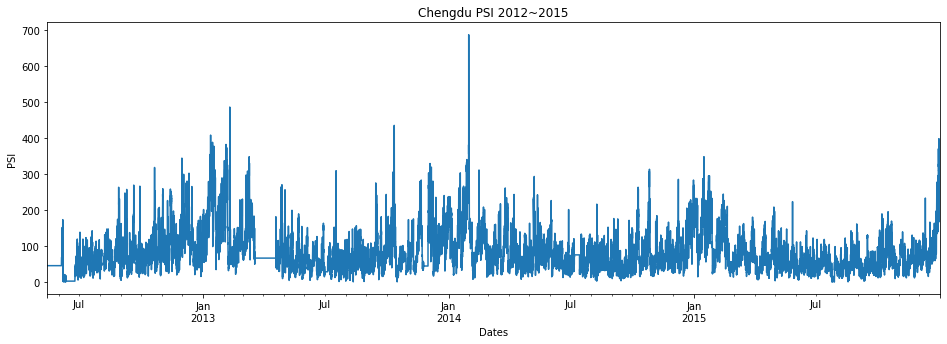

In [14]:
Chengdu_p = Chengdu
Chengdu_p.set_index(Chengdu.index).asfreq('H')
ax = Chengdu_p['PM_US Post'].plot(figsize = (16,5), title = "Chengdu PSI 2012~2015")
ax.set(xlabel='Dates', ylabel='PSI');

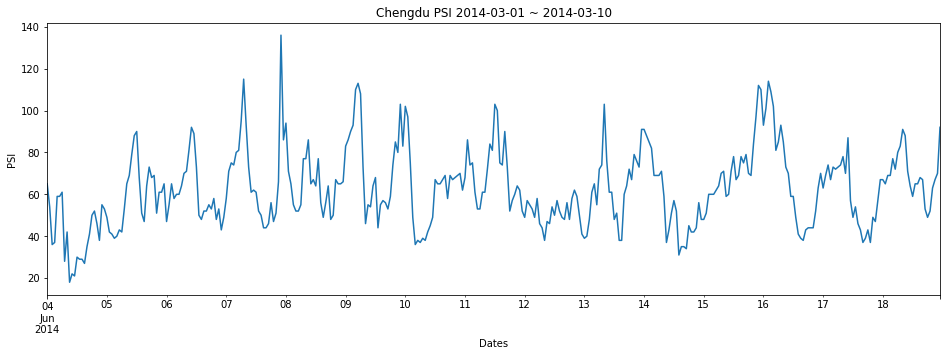

In [15]:
ax = df['PM_US Post'].plot(figsize = (16,5), title = "Chengdu PSI 2014-03-01 ~ 2014-03-10")
ax.set(xlabel='Dates', ylabel='PSI');

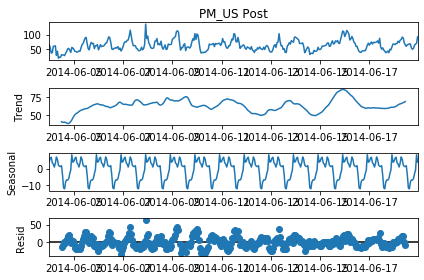

In [16]:
a = seasonal_decompose(df["PM_US Post"], model = "add")
a.plot();

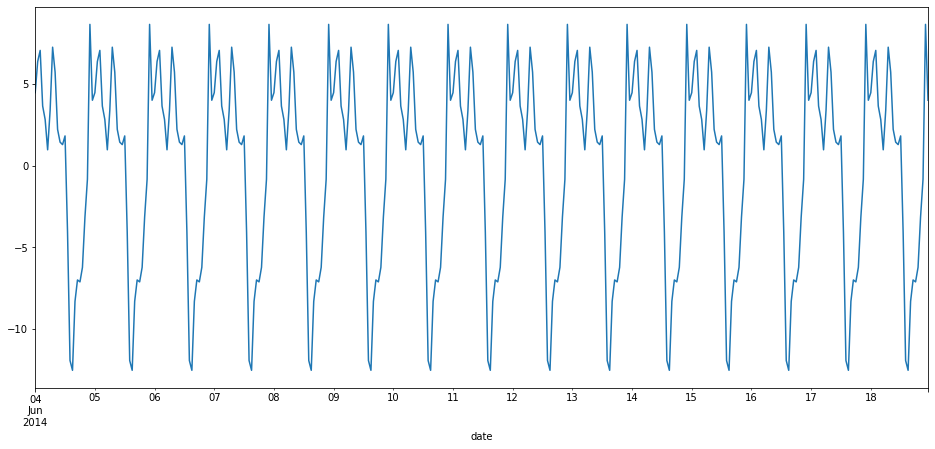

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();
# Show a daily pattern

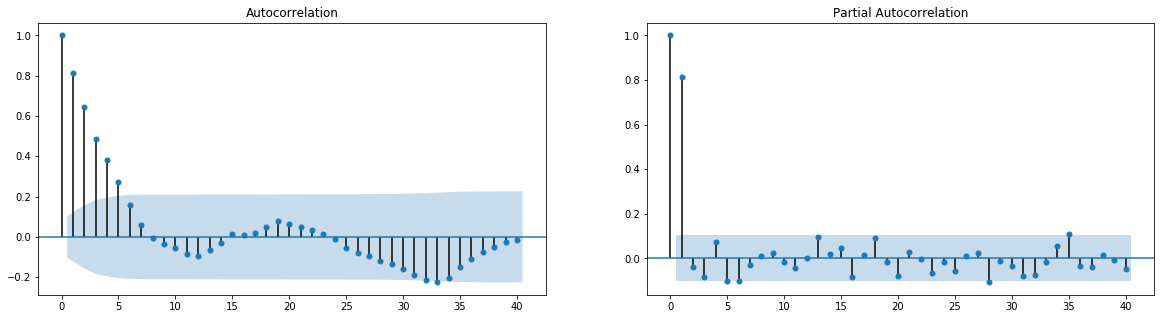

In [18]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(df['PM_US Post'], lags=40, ax=axes[0], fft=False)
plot_pacf(df['PM_US Post'], lags=40, ax=axes[1])
plt.show()

In [19]:
import statsmodels.api as sm

res = sm.tsa.stattools.arma_order_select_ic(df['PM_US Post'], ic=['aic']) 
print (res.aic_min_order)

(2, 1)


In [20]:
#auto_arima() function to get best p,d,q,P,D,Q values
auto_arima(df['PM_US Post'], start_p = 0, start_q = 0, 
                          max_p = 5, max_q = 3, m=24,
                          start_P = 0, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True).summary()

Performing stepwise search to minimize aic
Fit ARIMA: (0, 0, 0)x(0, 1, 1, 24) (constant=True); AIC=2955.192, BIC=2966.644, Time=2.970 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 24) (constant=True); AIC=3140.019, BIC=3147.653, Time=0.100 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 24) (constant=True); AIC=2680.435, BIC=2695.704, Time=2.385 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 24) (constant=True); AIC=2759.762, BIC=2775.031, Time=5.599 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 24); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 24) (constant=False); AIC=3140.085, BIC=3143.902, Time=0.070 seconds
Fit ARIMA: (1, 0, 0)x(0, 1, 0, 24) (constant=True); AIC=2767.645, BIC=2779.096, Time=0.545 seconds
Fit ARIMA: (1, 0, 0)x(2, 1, 0, 24) (constant=True); AIC=2649.702, BIC=2668.787, Time=8.417 seconds
Fit ARIMA: (1, 0, 0)x(2, 1, 1, 24) (constant=True); AIC=2610.575, BIC=2633.478, Time=26.722 seconds
Near

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  360
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 24)   Log Likelihood               -1299.353
Date:                              Sat, 25 Apr 2020   AIC                           2608.705
Time:                                      12:14:49   BIC                           2627.791
Sample:                                           0   HQIC                          2616.313
                                              - 360                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1481      0.157      0.941      0.347      -0.160       0.456
ar.L1          0.8053      0.028     28.485      0.000       0.750       0.861
ar.S.L24       0.0235      0.064      0.367      0.713      -0.102       0.149
ma.S.L24      -0.9992     11.805     -0.085      0.933     -24.136      22.137
sigma2       110.3445   1299.417      0.085      0.932   -2436.466    2657.155
===================================================================================
Ljung-Box (Q):                       39.25   Jarque-Bera (JB):               156.27
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
# the best arima model chosen by auto_arima() is SARIMAX(1, 0, 0)x(1, 1, [1], 24)


# split the data into train and test set
train_data = df[:len(df)-72]
test_data = df[len(df)-72:]

arima_model = SARIMAX(train_data['PM_US Post'], order = (1, 0, 0), seasonal_order = (1, 1, [1], 24))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           PM_US Post   No. Observations:                  288
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 24)   Log Likelihood               -1037.936
Date:                              Sat, 25 Apr 2020   AIC                           2083.872
Time:                                      12:14:54   BIC                           2098.175
Sample:                                  06-04-2014   HQIC                          2089.619
                                       - 06-15-2014                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8087      0.031     26.482      0.000       0.749       0.869
ar.S.L24      -0.0211      0.077     -0.274      0.784      -0.172       0.129
ma.S.L24      -0.9997     51.027     -0.020      0.984    -101.010      99.010
sigma2       120.5469   6147.042      0.020      0.984   -1.19e+04    1.22e+04
===================================================================================
Ljung-Box (Q):                       39.42   Jarque-Bera (JB):               112.38
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2014-06-16 00:00:00    103.980974
2014-06-16 01:00:00     97.183616
2014-06-16 02:00:00     88.731125
2014-06-16 03:00:00     81.218951
2014-06-16 04:00:00     77.811743
                          ...    
2014-06-18 19:00:00     59.074273
2014-06-18 20:00:00     61.779344
2014-06-18 21:00:00     64.151847
2014-06-18 22:00:00     73.578634
2014-06-18 23:00:00     66.835969
Freq: H, Name: ARIMA Predictions, Length: 72, dtype: float64

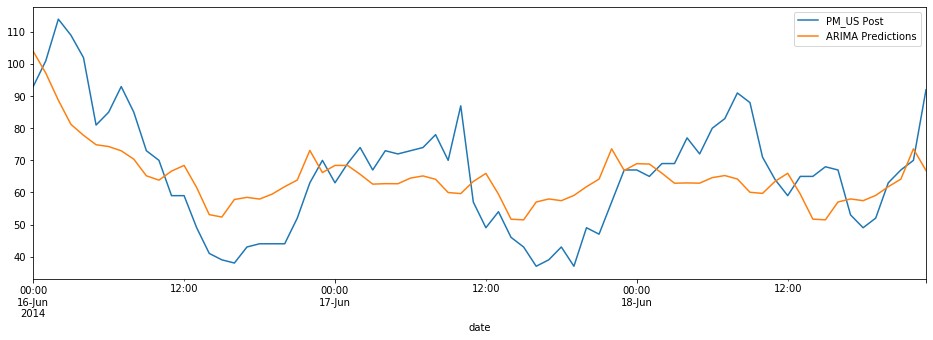

In [23]:
test_data['PM_US Post'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [24]:
arima_rmse_error = rmse(test_data['PM_US Post'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['PM_US Post'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 185.75261978545385
RMSE Error: 13.629109280707006
Mean: 62.6


In [25]:
test_data['ARIMA_Predictions'] = arima_pred

### 

In [26]:
##LSTM Forecast

In [27]:
################################################################################################################################

In [28]:
#df

In [29]:
# Scale train and test data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [30]:
# Before creating LSTM model, create a Time Series Generator object.
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 1
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [31]:
lstm_model.fit_generator(generator,epochs=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
287/287 [==============================] - 1s 3ms/step - loss: 0.0359
Epoch 2/50
287/287 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 3/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 4/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0104
Epoch 5/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0102
Epoch 6/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0096
Epoch 7/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0096
Epoch 8/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0096
Epoch 9/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0095
Epoch 10/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0094
Epoch 11/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0095
Epoch 12/50
287/287 [==============================] - 1s 2

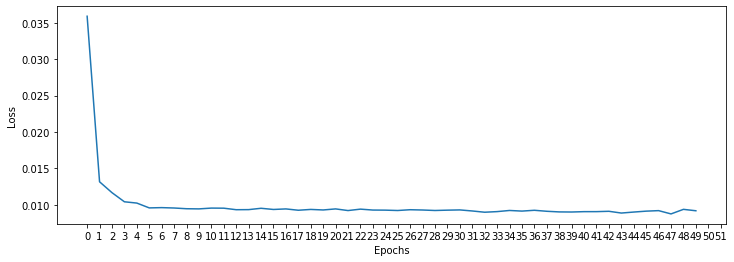

In [32]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,200,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [33]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [34]:
lstm_predictions_scaled

[array([0.6783836], dtype=float32),
 array([0.62724954], dtype=float32),
 array([0.6014394], dtype=float32),
 array([0.5877954], dtype=float32),
 array([0.57707417], dtype=float32),
 array([0.56701815], dtype=float32),
 array([0.55761695], dtype=float32),
 array([0.54885525], dtype=float32),
 array([0.540713], dtype=float32),
 array([0.5331669], dtype=float32),
 array([0.5261907], dtype=float32),
 array([0.51975656], dtype=float32),
 array([0.5138351], dtype=float32),
 array([0.50839627], dtype=float32),
 array([0.5034098], dtype=float32),
 array([0.49884585], dtype=float32),
 array([0.49467507], dtype=float32),
 array([0.49086893], dtype=float32),
 array([0.4874], dtype=float32),
 array([0.48424223], dtype=float32),
 array([0.4813707], dtype=float32),
 array([0.47876206], dtype=float32),
 array([0.47639444], dtype=float32),
 array([0.47424722], dtype=float32),
 array([0.4723013], dtype=float32),
 array([0.47053903], dtype=float32),
 array([0.46894407], dtype=float32),
 array([0.467501

In [35]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[98.04926348],
       [92.01544559],
       [88.96985114],
       [87.35985446],
       [86.09475207],
       [84.90814185],
       [83.79879999],
       [82.76491892],
       [81.80413544],
       [80.91369247],
       [80.09050238],
       [79.33127356],
       [78.63253856],
       [77.99075961],
       [77.40235674],
       [76.86380976],
       [76.37165827],
       [75.92253327],
       [75.51319945],
       [75.14058322],
       [74.80174112],
       [74.49392313],
       [74.21454448],
       [73.96117163],
       [73.73155391],
       [73.52360594],
       [73.33540058],
       [73.16514432],
       [73.01121247],
       [72.87209988],
       [72.74643153],
       [72.63294494],
       [72.53049719],
       [72.43804735],
       [72.35463184],
       [72.27938557],
       [72.21153486],
       [72.1503588 ],
       [72.09521031],
       [72.04549861],
       [72.00069618],
       [71.96032828],
       [71.92396587],
       [71.89120102],
       [71.86168557],
       [71

In [36]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data

,PM_US Post,ARIMA_Predictions,LSTM_Predictions
date,,,
2014-06-16 00:00:00,93.0,103.980974,98.049263
2014-06-16 01:00:00,101.0,97.183616,92.015446
2014-06-16 02:00:00,114.0,88.731125,88.969851
2014-06-16 03:00:00,109.0,81.218951,87.359854
2014-06-16 04:00:00,102.0,77.811743,86.094752
...,...,...,...
2014-06-18 19:00:00,52.0,59.074273,71.618694
2014-06-18 20:00:00,63.0,61.779344,71.616320
2014-06-18 21:00:00,67.0,64.151847,71.614186


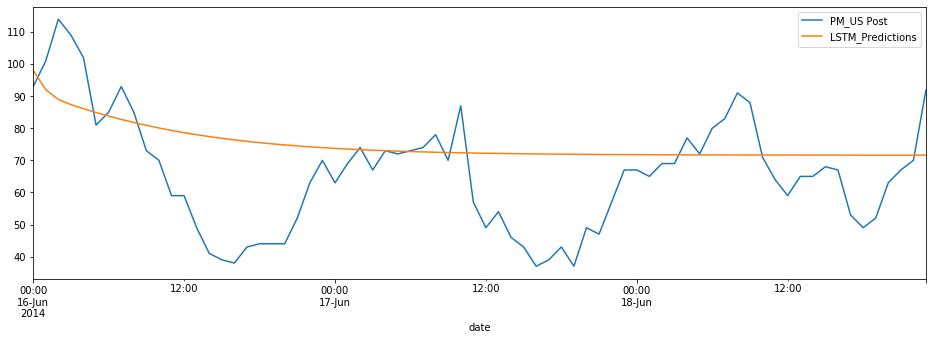

In [37]:
test_data['PM_US Post'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [38]:
lstm_rmse_error = rmse(test_data['PM_US Post'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['PM_US Post'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 334.8893768894813
RMSE Error: 18.29998297511452
Mean: 62.6


In [39]:
################################################################################################################################

In [40]:
##Prophet Forecast

In [41]:
################################################################################################################################

In [42]:
df_pr = df.copy()
df_pr = df.reset_index()
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df)-72]
test_data_pr = df_pr.iloc[len(df)-72:]
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=72,freq='H')
prophet_pred = m.predict(future)
prophet_pred

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-06-04 00:00:00,51.527865,37.002131,81.359187,51.527865,51.527865,7.350375,7.350375,7.350375,7.350375,7.350375,7.350375,0.0,0.0,0.0,58.878240
1,2014-06-04 01:00:00,51.656948,32.827744,77.159819,51.656948,51.656948,4.220528,4.220528,4.220528,4.220528,4.220528,4.220528,0.0,0.0,0.0,55.877476
2,2014-06-04 02:00:00,51.786032,30.959732,75.949057,51.786032,51.786032,0.906320,0.906320,0.906320,0.906320,0.906320,0.906320,0.0,0.0,0.0,52.692352
3,2014-06-04 03:00:00,51.915116,30.254977,73.586464,51.915116,51.915116,-0.424082,-0.424082,-0.424082,-0.424082,-0.424082,-0.424082,0.0,0.0,0.0,51.491034
4,2014-06-04 04:00:00,52.044199,32.436962,74.148534,52.044199,52.044199,0.578032,0.578032,0.578032,0.578032,0.578032,0.578032,0.0,0.0,0.0,52.622232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2014-06-18 19:00:00,63.587009,39.693062,84.879119,62.757834,64.402659,-1.625074,-1.625074,-1.625074,-1.625074,-1.625074,-1.625074,0.0,0.0,0.0,61.961935
356,2014-06-18 20:00:00,63.584764,42.228955,84.519191,62.746307,64.416866,0.206989,0.206989,0.206989,0.206989,0.206989,0.206989,0.0,0.0,0.0,63.791754
357,2014-06-18 21:00:00,63.582520,44.253674,89.722515,62.728713,64.436103,2.972904,2.972904,2.972904,2.972904,2.972904,2.972904,0.0,0.0,0.0,66.555424
358,2014-06-18 22:00:00,63.580276,49.352920,91.131196,62.717050,64.455579,6.196079,6.196079,6.196079,6.196079,6.196079,6.196079,0.0,0.0,0.0,69.776355


In [43]:
#df_pr

In [44]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-72:]['ds'], "Pred" : prophet_pred[-72:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "H"
prophet_pred

,Pred
Date,
2014-06-16 00:00:00,71.087752
2014-06-16 01:00:00,67.955661
2014-06-16 02:00:00,64.639209
2014-06-16 03:00:00,63.306562
2014-06-16 04:00:00,64.306432
...,...
2014-06-18 19:00:00,61.961935
2014-06-18 20:00:00,63.791754
2014-06-18 21:00:00,66.555424


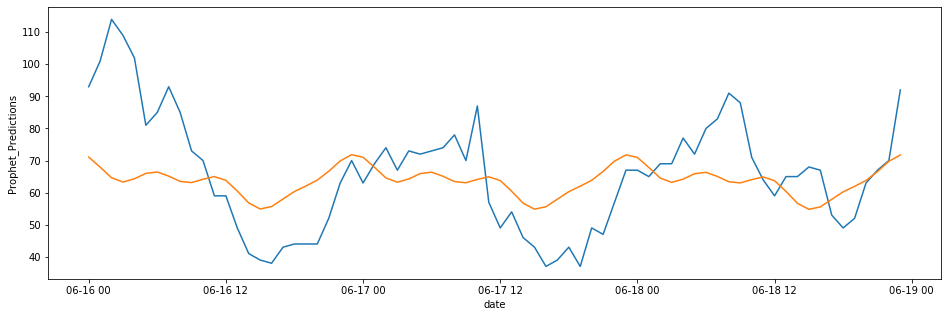

In [45]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["PM_US Post"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [46]:
prophet_rmse_error = rmse(test_data['PM_US Post'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['PM_US Post'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 269.93511671194483
RMSE Error: 16.429702270946507
Mean: 62.6


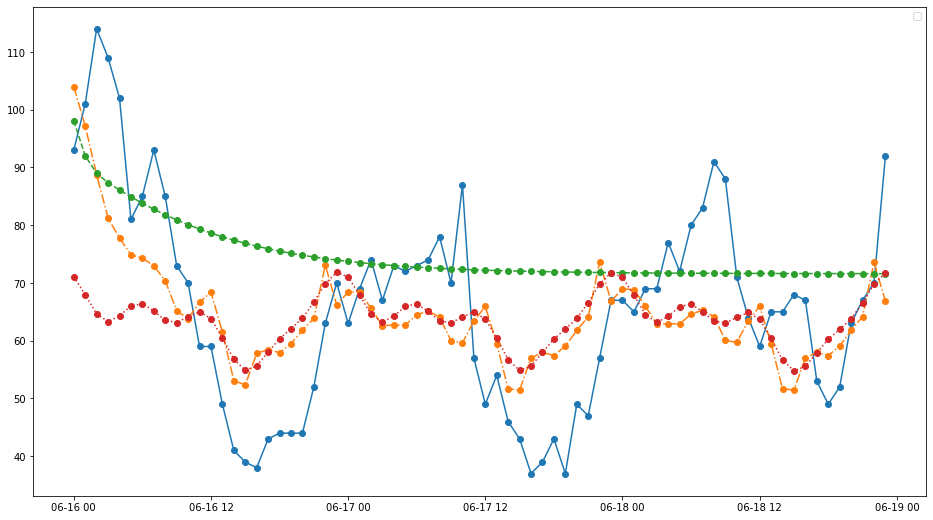

In [47]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["PM_US Post"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [48]:
print(f"Mean: {test_data['PM_US Post'].mean()}")
errors

Mean: 65.86111111111111


,Models,RMSE Errors,MSE Errors
0,ARIMA,13.629109,185.752620
1,LSTM,18.299983,334.889377
2,Prophet,16.429702,269.935117


In [49]:
test_data.head(50)

,PM_US Post,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions
date,,,,
2014-06-16 00:00:00,93.0,103.980974,98.049263,71.087752
2014-06-16 01:00:00,101.0,97.183616,92.015446,67.955661
2014-06-16 02:00:00,114.0,88.731125,88.969851,64.639209
2014-06-16 03:00:00,109.0,81.218951,87.359854,63.306562
2014-06-16 04:00:00,102.0,77.811743,86.094752,64.306432
2014-06-16 05:00:00,81.0,74.867163,84.908142,66.004299
2014-06-16 06:00:00,85.0,74.298835,83.798800,66.432296
2014-06-16 07:00:00,93.0,72.979889,82.764919,65.147053
2014-06-16 08:00:00,85.0,70.368142,81.804135,63.505324
